In [1]:
import pandas as pd

In [2]:
import pandas_datareader as pdr
key =""

In [3]:
df = pd.read_csv('AAPL.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
df1 = df.reset_index()['close']           ## this is the close column
df1

0       132.045
1       131.780
2       130.280
3       130.535
4       129.960
         ...   
1253    314.960
1254    313.140
1255    319.230
1256    316.850
1257    318.890
Name: close, Length: 1258, dtype: float64

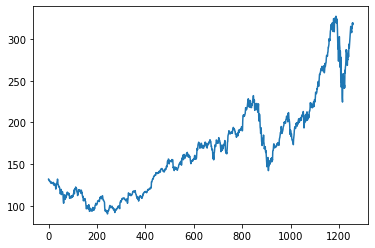

In [5]:
import matplotlib.pyplot as plt

plt.plot(df1)

In [6]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [7]:
m_scaler = MinMaxScaler(feature_range= (0,1))

In [8]:
df1 = m_scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [10]:
## split the data into train test

train_size = int(len(df1) * 0.65)
test_size = len(df1) - train_size

train_data ,test_data = df1[0:train_size,:], df1[train_size:len(df1), :1]

In [11]:
print(train_data.shape , test_data.shape)

(817, 1) (441, 1)


In [12]:
train_size, test_size

(817, 441)

In [19]:
def create_dataset(dataset, time_step =1):
    data_x , data_y = [], []
    for i in range(len(dataset)-time_step -1):
        a = dataset[i :(i + time_step), 0]
        data_x.append(a)
        
        data_y.append(dataset[i + time_step, 0])
        
    return np.array(data_x), np.array(data_y)

In [20]:
time_step =100

x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [21]:
x_train.shape

(716, 100)

In [22]:
x_test.shape

(340, 100)

In [23]:
y_test.shape

(340,)

In [24]:
y_train.shape

(716,)

In [25]:
# reshape input to be [samples, time steps, features] which is required for LSTM

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [26]:
print(x_train.shape), print(x_test.shape)

(716, 100, 1)
(340, 100, 1)


(None, None)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
model = Sequential()
model.add(LSTM(units= 50, return_sequences= True, input_shape =(100,1)))
model.add(LSTM(50, return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))

In [29]:
model.compile(loss= 'mean_squared_error', optimizer ='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 100, batch_size = 65, verbose =1)

Epoch 1/100
12/12 [==============================] - 3s 243ms/step - loss: 3.5609e-04 - val_loss: 0.0015
Epoch 2/100
12/12 [==============================] - 3s 225ms/step - loss: 3.8169e-04 - val_loss: 0.0017
Epoch 3/100
12/12 [==============================] - 3s 229ms/step - loss: 3.4631e-04 - val_loss: 0.0107
Epoch 4/100
12/12 [==============================] - 3s 220ms/step - loss: 0.0012 - val_loss: 0.0055
Epoch 5/100
12/12 [==============================] - 3s 218ms/step - loss: 4.7150e-04 - val_loss: 0.0016
Epoch 6/100
12/12 [==============================] - 3s 219ms/step - loss: 3.8948e-04 - val_loss: 0.0016
Epoch 7/100
12/12 [==============================] - 3s 216ms/step - loss: 3.7045e-04 - val_loss: 0.0015
Epoch 8/100
12/12 [==============================] - 3s 223ms/step - loss: 3.2765e-04 - val_loss: 0.0022
Epoch 9/100
12/12 [==============================] - 3s 224ms/step - loss: 5.1329e-04 - val_loss: 0.0054
Epoch 10/100
12/12 [==============================] - 3s 21

Epoch 78/100
12/12 [==============================] - 3s 218ms/step - loss: 1.3517e-04 - val_loss: 0.0013
Epoch 79/100
12/12 [==============================] - 3s 215ms/step - loss: 1.9660e-04 - val_loss: 0.0014
Epoch 80/100
12/12 [==============================] - 3s 218ms/step - loss: 1.7815e-04 - val_loss: 0.0010
Epoch 81/100
12/12 [==============================] - 3s 217ms/step - loss: 1.4370e-04 - val_loss: 7.5983e-04
Epoch 82/100
12/12 [==============================] - 3s 217ms/step - loss: 1.3723e-04 - val_loss: 7.6931e-04
Epoch 83/100
12/12 [==============================] - 3s 216ms/step - loss: 1.3393e-04 - val_loss: 8.0600e-04
Epoch 84/100
12/12 [==============================] - 3s 216ms/step - loss: 1.3439e-04 - val_loss: 9.7370e-04
Epoch 85/100
12/12 [==============================] - 3s 218ms/step - loss: 1.3226e-04 - val_loss: 9.5039e-04
Epoch 86/100
12/12 [==============================] - 3s 217ms/step - loss: 1.4656e-04 - val_loss: 7.1994e-04
Epoch 87/100
12/12 [==

In [32]:
train_pred = model.predict(x_train)

test_pred = model.predict(x_test)

11/11 [==============================] - 1s 47ms/step


In [34]:
train_pred

array([[0.08934796],
       [0.08869937],
       [0.08847688],
       [0.09034039],
       [0.09346092],
       [0.09798226],
       [0.10551395],
       [0.11052583],
       [0.11112656],
       [0.11255655],
       [0.11636849],
       [0.12017097],
       [0.1240696 ],
       [0.12842773],
       [0.13165511],
       [0.13215971],
       [0.13070916],
       [0.12810361],
       [0.12211178],
       [0.11441505],
       [0.10737808],
       [0.09980692],
       [0.09483856],
       [0.09272176],
       [0.09587558],
       [0.103497  ],
       [0.11271916],
       [0.11917229],
       [0.12270749],
       [0.1229701 ],
       [0.12088452],
       [0.11836204],
       [0.11556149],
       [0.11221416],
       [0.1082215 ],
       [0.1079409 ],
       [0.11021845],
       [0.11330953],
       [0.11368202],
       [0.11215729],
       [0.10747799],
       [0.10105933],
       [0.09355502],
       [0.08773252],
       [0.0827245 ],
       [0.07667311],
       [0.0718379 ],
       [0.069

In [35]:
##Transformback to original form

train_pred = m_scaler.inverse_transform(train_pred)

test_pred = m_scaler.inverse_transform(test_pred)

In [36]:
train_pred

array([[111.50295 ],
       [111.34933 ],
       [111.29663 ],
       [111.73802 ],
       [112.47715 ],
       [113.54807 ],
       [115.33203 ],
       [116.51915 ],
       [116.66144 ],
       [117.00014 ],
       [117.90304 ],
       [118.80369 ],
       [119.72713 ],
       [120.75939 ],
       [121.52383 ],
       [121.64335 ],
       [121.299774],
       [120.68262 ],
       [119.2634  ],
       [117.440346],
       [115.773575],
       [113.98027 ],
       [112.80346 ],
       [112.30207 ],
       [113.04909 ],
       [114.854294],
       [117.03866 ],
       [118.56714 ],
       [119.404495],
       [119.4667  ],
       [118.97271 ],
       [118.37523 ],
       [117.71189 ],
       [116.919044],
       [115.97334 ],
       [115.90688 ],
       [116.44634 ],
       [117.17849 ],
       [117.26672 ],
       [116.90557 ],
       [115.79723 ],
       [114.27692 ],
       [112.49944 ],
       [111.12032 ],
       [109.93413 ],
       [108.50079 ],
       [107.35552 ],
       [106.7

In [37]:
import math
from sklearn.metrics import mean_squared_error

In [38]:
## This is the RMSE (error value) of training data        RMSE => root of mean squared error 

math.sqrt(mean_squared_error(y_train, train_pred))

141.0460058446989

In [39]:
## This is the RMSE (error value) of test data

math.sqrt(mean_squared_error(y_test, test_pred))

234.0180925337192

In [40]:
## shift train predictions for plotting
look_back = 100

train_pred_plot = np.empty_like(df1)
train_pred_plot[:,:] = np.nan
train_pred_plot[look_back: len(train_pred)+look_back ,:] = train_pred

## shift test prediction for plotting
test_pred_plot = np.empty_like(df1)
test_pred_plot[:,:] = np.nan
train_pred_plot[len(train_pred)+(look_back*2)+1 : len(df1)-1, :] = test_pred

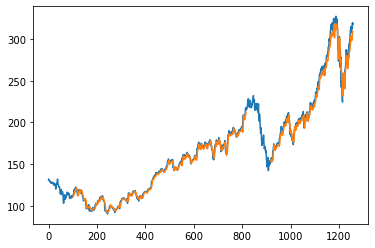

In [41]:
## plot base line and prediction
plt.plot(m_scaler.inverse_transform(df1))
plt.plot(train_pred_plot)
plt.plot(test_pred_plot)
plt.show()

In [42]:
len(test_data)

441

In [43]:
## we need previous 100 days data to predict next days data

x_input = test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [44]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [45]:
len(temp_input)

100

In [47]:
# demonstrate prediction for next 30 days

lst_ouput = []
n_steps = 100
i =0

while(i < 30):
    
    if(len(temp_input) > 100):
        x_input = np.array(temp_input[1:])
        print('{} day input {}'.format(i, x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        y_hat = model.predict(x_input, verbose= 0)
        print('{} day output {}'.format(i, y_hat))
        
        temp_input.extend(y_hat[0].tolist())
        temp_input = temp_input[1:]
        
        lst_ouput.extend(y_hat.tolist())
        i = i+1
        
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        y_hat = model.predict(x_input, verbose=0)
        print(y_hat[0])
        
        temp_input.extend(y_hat[0].tolist())
        print(len(temp_input))
        lst_ouput.extend(y_hat.tolist())
        
        i = i+1
        
print(lst_ouput)

[0.92365676]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

 0.82734585 0.82098407 0.81760579 0.81585032]
9 day output [[0.8145735]]
10 day input [0.93304061 0.94950604 0.96424048 0.95512117 0.95989192 0.96635143
 0.96246728 0.92295027 0.9598497  0.98792536 0.98594106 0.92531453
 0.92172591 0.96474711 0.97572406 0.99159841 0.96972895 0.97614625
 0.96795575 1.         0.99016297 0.99050072 0.96538039 0.98488559
 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823
 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995
 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044
 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673
 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197
 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111
 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492
 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106
 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403
 0.90095415 0.92793211 0.948535   0.9333361

18 day output [[0.77932775]]
19 day input [0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.90095415 0.92793211 0.948535
 0.93333615 0.91746179 0.92544119 0.91771511 0.9483239  0.94064004
 0.96635143 0.9563033  0.96491598 0.92365676 0.90261841 0.87647969
 0.8543002  0.83807003 0

27 day output [[0.74748915]]
28 day input [0.96795575 1.         0.99016297 0.99050072 0.96538039 0.98488559
 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823
 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995
 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044
 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673
 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197
 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111
 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492
 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106
 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403
 0.90095415 0.92793211 0.948535   0.93333615 0.91746179 0.92544119
 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598
 0.92365676 0.90261841 0.87647969 0.8543002  0.83807003 0.82734585
 0.82098407 0.81760579 0.81585032 0.81457353 0.81296444 0.81057459
 0.80727518 0.803173

In [48]:
day_new = np.arange(1,101)

day_pred = np.arange(101, 131)

In [49]:
len(df1)

1258

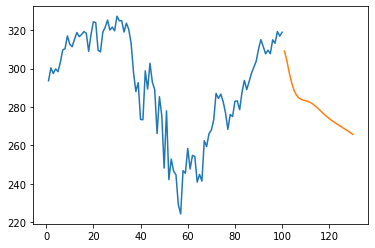

In [50]:
plt.plot(day_new, m_scaler.inverse_transform(df1[1158:]))

plt.plot(day_pred, m_scaler.inverse_transform(lst_ouput))

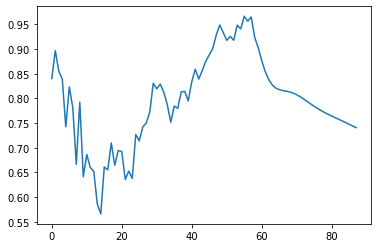

In [51]:
df2 = df1.tolist()
df2.extend(lst_ouput)
plt.plot(df2[1200:])

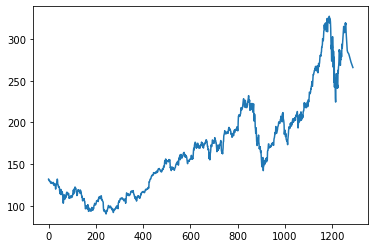

In [52]:
df2 = m_scaler.inverse_transform(df2).tolist()

plt.plot(df2)